In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt 
from scipy.fftpack import fft,ifft
import librosa

In [2]:
# A function to plot signal
def plot_signal(s, i):
    plt.figure()
    plt.plot(time_axis[i * hop_size : (i * hop_size + win_size)], s)
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")


# A function to plot spectrogram
def plot_spectrogram(spectrogram):
    plt.figure(figsize=(10, 4))

    # Plot the power spectrogram
    plt.subplot(1, 2, 1)
    plt.imshow(spectrogram, aspect="auto", origin="lower")
    plt.title("Power Spectrogram")
    plt.xlabel("Time (s)")
    plt.ylabel("Frequency (Hz)")
    plt.colorbar(format="%+2.0f dB", label="Power (dB)")

    # Handle the division by zero error
    spectrogram[spectrogram == 0] = np.finfo(float).eps

    # Plot the logarithm of the power spectrogram
    plt.subplot(1, 2, 2)
    plt.imshow(10 * np.log10(spectrogram), aspect="auto", origin="lower")
    plt.title("Logarithm of Power Spectrogram")
    plt.xlabel("Time (s)")
    plt.ylabel("Frequency (Hz)")
    plt.colorbar(format="%+2.0f dB", label="Logarithm of Power (dB)")

    plt.tight_layout()
    plt.show()

### 1.  Implement a function to compute power spectrogram. (1 point)

Sampling rate:  44100


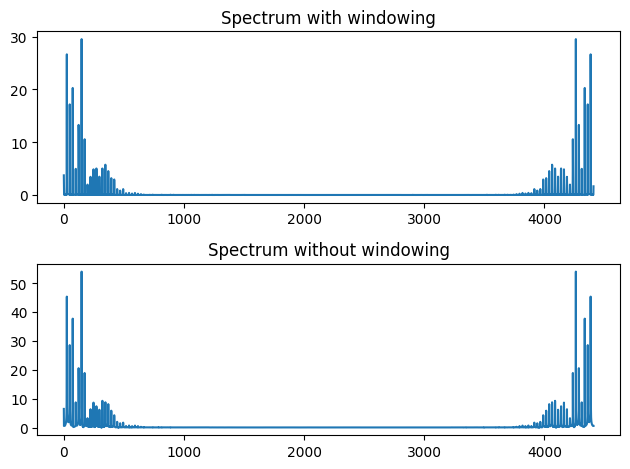

In [3]:
# Read audio
audio, fs = librosa.load("audio1.wav", sr=None)
print("Sampling rate: ", fs)
# Set parameters
time_axis = np.linspace(0, len(audio) / fs, num=len(audio), endpoint=False)
win_size = int(0.1 * fs)
window = np.hamming(win_size)
hop_size = win_size // 2 # b) Add overlap between consecutive signal frames.
nfft = int(win_size)
nframes = 1 + int((len(audio) - win_size) / hop_size)
power_spectrogram = np.zeros((nfft, nframes))
# Loop through the frames
for i in range(nframes):
    # Select audio frame
    segment = audio[i * hop_size : (i * hop_size + win_size)]
    # a) Multiply each signal frame with a windowing function.
    segment_wind = segment * window
    # DFT spectrum
    # Select a frame and plot the spectrum with and without windowing.
    spectrum = fft(segment_wind, nfft)
    spectrum_without_window = fft(segment, nfft)
    # c) Collect the power spectrum into a matrix.
    power_spectrum = np.abs(spectrum) ** 2
    power_spectrogram[:, i] = power_spectrum
    
    if i == 10:
        # Plot the spectrum with and without windowing.
        plt.figure()
        plt.subplot(2, 1, 1)
        plt.plot(np.abs(spectrum))
        plt.title("Spectrum with windowing")
        plt.subplot(2, 1, 2)
        plt.plot(np.abs(spectrum_without_window))
        plt.title("Spectrum without windowing")
        plt.tight_layout()
        plt.show()

In [4]:
# Plot the power spectrum with and without windowing.
def plot_spectrum(spectrum, fs):
    plt.figure()
    plt.plot(spectrum)
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.show()


#### Plot the matrix (power_spectrogram) as an image.

#### Plot the logarithm of the matrix.

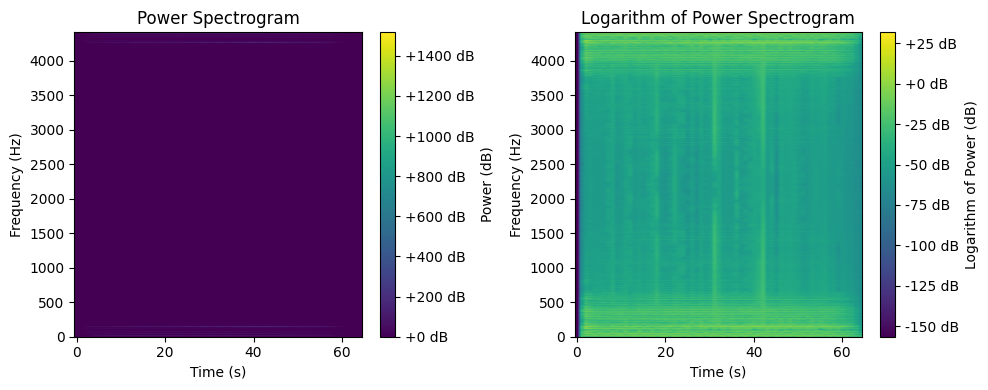

In [5]:
# Plot the spectrogram
plot_spectrogram(power_spectrogram)

#### What differences do you observe?

When I take the logarithm of the matrix, the values are more spread out, and the differences between the values are more visible. Comparing with the power spectrogram, the logarithm of the matrix is more clear to see the differences between the values.

### 2.  Analyse the effect of window size on the spectrum. (1 point)

#### a) Calculate spectrogram with librosa and nfft=window size

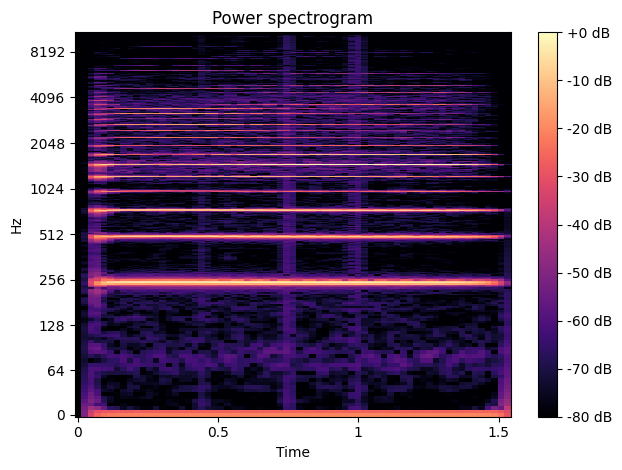

In [6]:
# Load audio
y, sr = librosa.load('audio1.wav')
y2, sr2 = librosa.load('audio2.wav')
# Display spectrogram
librosa.display.specshow(librosa.amplitude_to_db(np.abs(librosa.stft(y, n_fft=win_size)), ref=np.max), y_axis='log', x_axis='time')
plt.title('Power spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()

#### Are there any differences from your own implementation?

Yes, the spectrogram with librosa is clearer to see the differences between the frequencies.

#### b) Apply your implementation with different window sizes (16ms, 32ms, 64ms and 128ms) to different signals (audio1, audio2 and synthetic sinusoids from exercise 1)

#### Note. You can define your implementation from problem 1 as a function and call it for each of the signals.

In [7]:
def create_sin_waves(A, f, phi, fs, t):
    """
    Create a sine wave with the given parameters
    :param A: amplitude
    :param f: frequency
    :param phi: phase
    :param fs: sampling frequency
    :param t: time
    """
    y = A * np.sin(2 * np.pi * f * t + phi)
    return y
# Setting the signal parameters
fs = 8000
t = np.arange(0, 3, 1/fs)
f = np.array([100, 500, 1500, 2500])
A = np.array([1, 0.5, 0.25, 0.125])
phi = np.array([0, np.pi/2, np.pi, 3*np.pi/2])

# Creating the signals
s = np.zeros((4, len(t)))
for i in range(4):
    s[i, :] = create_sin_waves(A[i], f[i], phi[i], fs, t)
x = np.sum(s, axis=0)

In [8]:
def plot_multiple_spectrogram(y,sr):
    # Define the window sizes
    window_sizes = [int(sr * ms / 1000) for ms in [16, 32, 64, 128]]
    plt.figure(figsize=(12, 8))
    for i, window_size in enumerate(window_sizes):
        # Compute the spectrogram using librosa
        D = librosa.stft(y, n_fft=window_size, hop_length=window_size//2)
        
        # Display the spectrogram
        plt.subplot(2, 2, i+1)
        librosa.display.specshow(librosa.amplitude_to_db(np.abs(D), ref=np.max), sr=sr, x_axis='time', y_axis='log')
        plt.colorbar(format='%+2.0f dB')
        plt.title('Spectrogram (window size = {} ms)'.format(window_size * 1000 / sr))
    
    plt.tight_layout()
    plt.show()
        

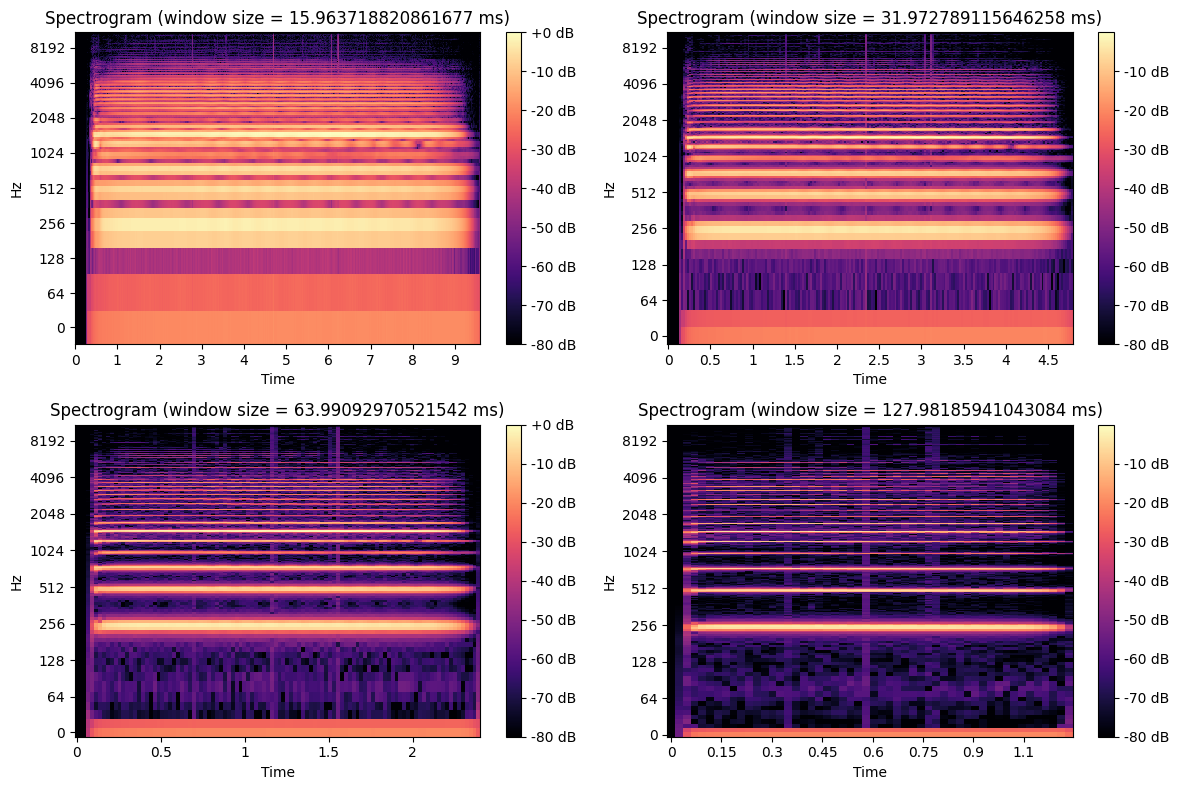

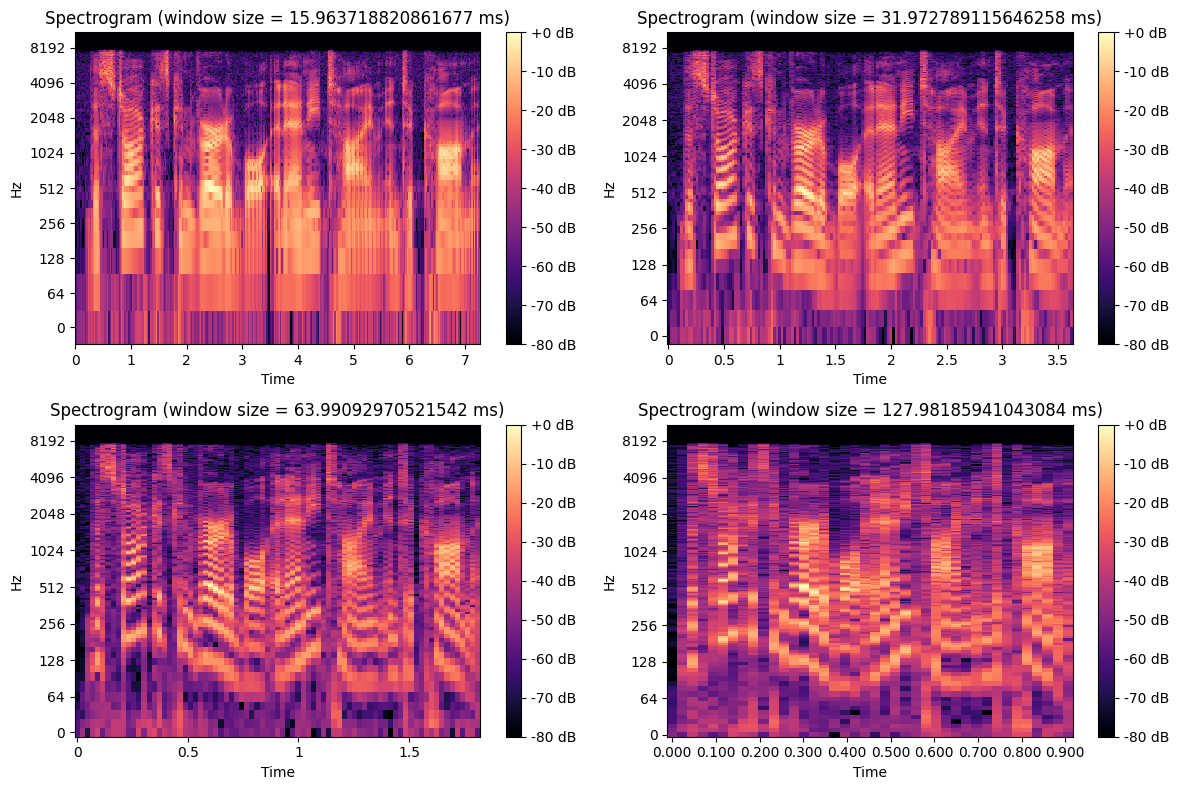

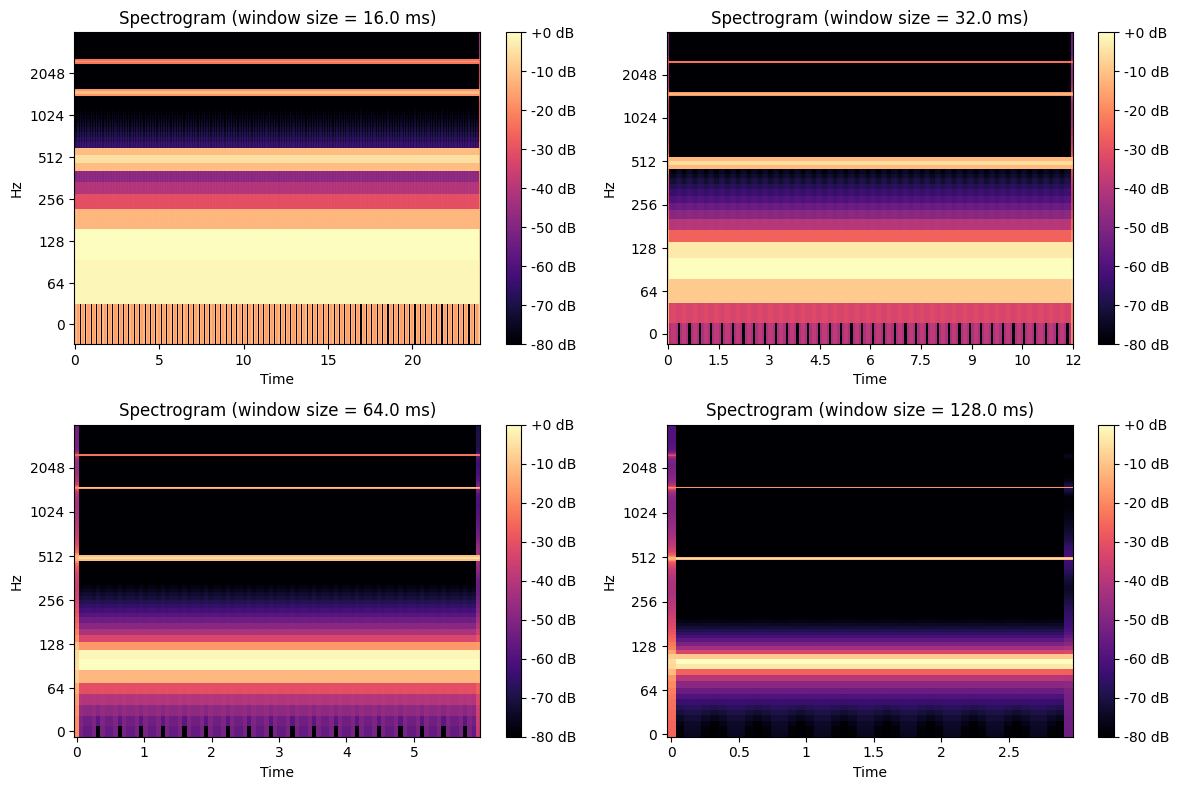

In [9]:
# Plot the spectrogram of the signal
plot_multiple_spectrogram(y, sr)
plot_multiple_spectrogram(y2, sr2)
plot_multiple_spectrogram(x, fs)

If we would like to use the code from problem 1, we can implement something like this

In [10]:
def plot_logarithm_spectrogram(spectrogram):
    window_sizes = [int(sr * ms / 1000) for ms in [16, 32, 64, 128]]
    for i in range(len(spectrogram)):
        # handle the division by zero error
        # spectrogram[i, spectrogram[i] == 0] = np.finfo(float).eps
        spectrogram[i][spectrogram[i] == 0] = np.finfo(float).eps
        plt.subplot(2, 2, i+1)
        # plot the spectrogram
        plt.imshow(10 * np.log10(spectrogram[i]), aspect="auto", origin="lower")
        plt.title("Window size = {:.2f} ms)".format(window_sizes[i] * 1000 / sr))
        plt.xlabel("Time (s)")
        plt.ylabel("Frequency (Hz)")
        plt.colorbar(format="%+2.0f dB", label="Logarithm of Power (dB)")
    plt.tight_layout()
    plt.show()

In [11]:
def multiple_plot_spectrogram(audio, fs):
    time_axis = np.linspace(0, len(audio) / fs, num=len(audio), endpoint=False)
    # win size are 16ms, 32ms, 64ms, 128ms
    win_sizes = [int(fs * ms / 1000) for ms in [16, 32, 64, 128]]
    power_spectrogram_list = []
    for win_size in win_sizes:
        # go through the main function, but subplot the spectrogram
        window = np.hamming(win_size)
        hop_size = win_size // 2
        nfft = int(win_size)
        nframes = 1 + int((len(audio) - win_size) / hop_size)
        power_spectrogram = np.zeros((nfft, nframes))
        
        for i in range(nframes):
            segment = audio[i * hop_size : (i * hop_size + win_size)]
            segment_wind = segment * window
            spectrum = fft(segment_wind, nfft)
            power_spectrum = np.abs(spectrum) ** 2
            power_spectrogram[:, i] = power_spectrum
            
        power_spectrogram_list.append(power_spectrogram)
    plot_logarithm_spectrogram(power_spectrogram_list)

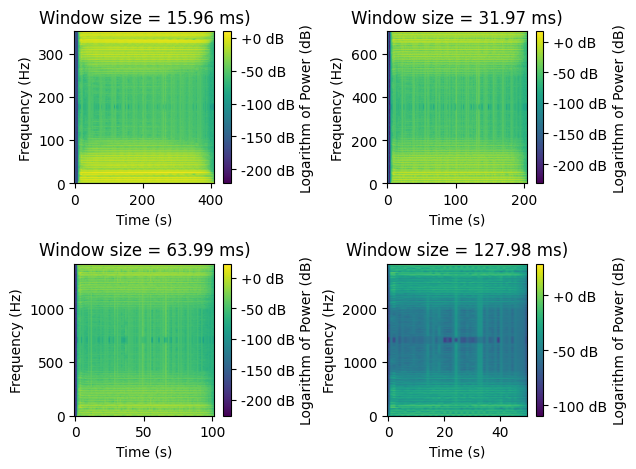

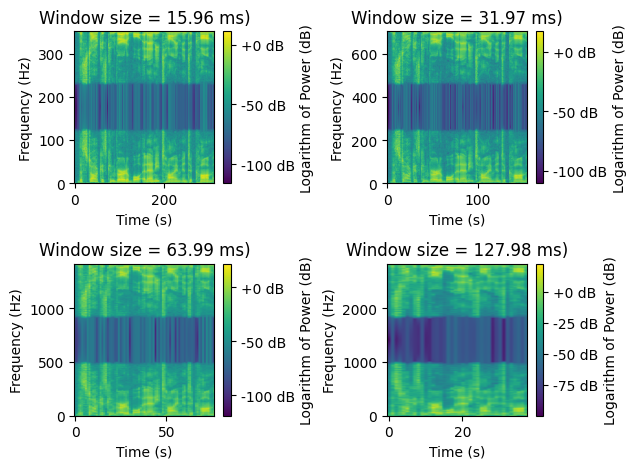

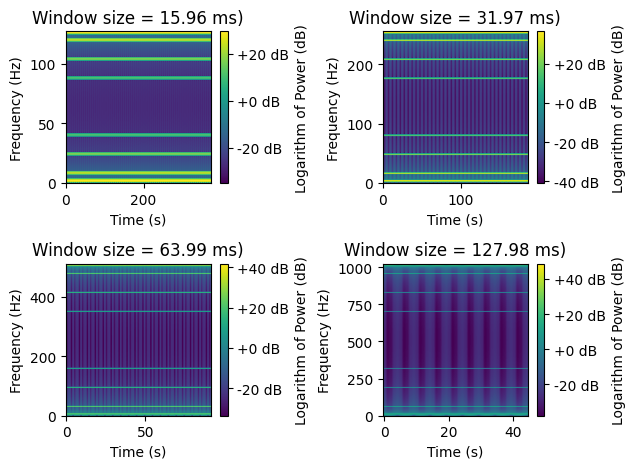

In [12]:
multiple_plot_spectrogram(y, sr)
multiple_plot_spectrogram(y2, sr2)
multiple_plot_spectrogram(x, fs)

#### c) What happens when the window size is increased?

When I increase the window size, the frequency resolution of the spectrogram increases, but the time resolution decreases. This is known as the time-frequency trade-off. 

#### What analysis window length is best for each of the signal types?

The best analysis window length for each of the signal types is 64ms, since the trade-off between the time resolution and the frequency resolution is the best. We could observe the main frequencies of the signal, and the time resolution is not too short compared to the other window sizes.

### Bonus problem: Implement overlap-add reconstruction